In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random
from scipy.optimize import curve_fit


import time

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 50
P = 0.15
G = nx.erdos_renyi_graph(N, P)

while min([d for n, d in G.degree()]) == 0:
    G = nx.erdos_renyi_graph(N, P)

Rappresentazione del grafico

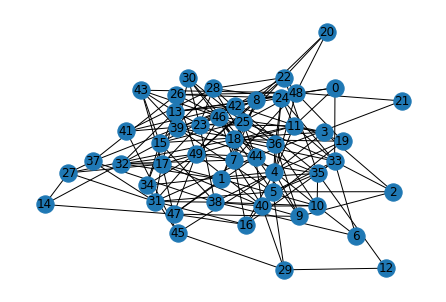

In [3]:
nx.draw(G, with_labels=True)
plt.show()

Distribuzione della connettività dei nodi

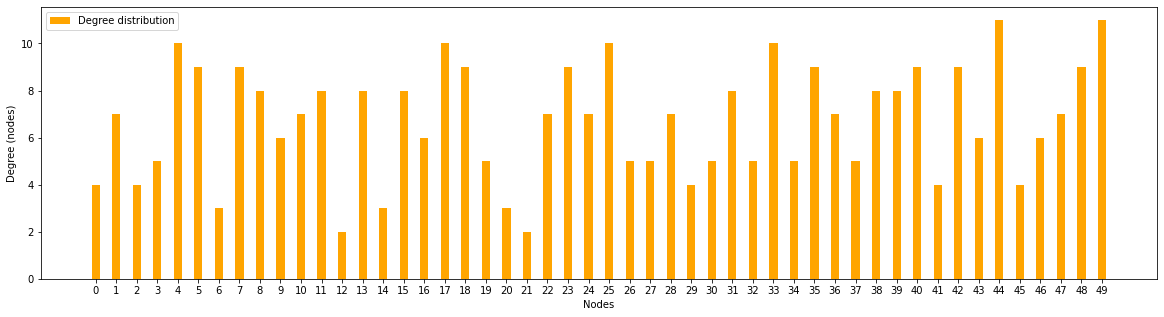

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.4*N, 5))

ax.bar(G.nodes, [d for n,d in G.degree], width=0.4, 
          align='center', color='orange', label='Degree distribution')

ax.legend()
ax.set_xlabel("Nodes")
ax.set_ylabel("Degree (nodes)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

Estrazione della matrice di adiacenza A

In [5]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [6]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [7]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)
pS = autovettoriP[0]
if pS[0] < 0:
    pS = -pS
#np.dot(np.transpose(matrix),autovettori[0])

In [8]:
autovaloriP

array([ 1.        , -0.6476375 ,  0.58964899,  0.58281573, -0.59005207,
       -0.58182806, -0.56613389,  0.53715007,  0.53053361,  0.50653245,
       -0.53225981, -0.50438423,  0.46971284, -0.47692789,  0.43271534,
        0.41764868,  0.39948477,  0.35893082,  0.34318232,  0.303626  ,
        0.29244638, -0.43603405, -0.41242115, -0.39680585,  0.22634303,
        0.2235264 ,  0.19514356,  0.17983573,  0.14590119,  0.13535217,
        0.10668106,  0.08598987,  0.05319323,  0.03239366,  0.00664821,
       -0.02097664, -0.35617533, -0.33216308, -0.07315443, -0.08783425,
       -0.10522159, -0.12685015, -0.15488883, -0.18031628, -0.20068667,
       -0.30825753, -0.29323222, -0.2651132 , -0.26007804, -0.24600335])

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [9]:
matrixL = np.identity(N) - matrixP

In [10]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)
pS_L = autovettoriL[0]
if pS_L[0] < 0:
    pS_L = -pS_L

In [11]:
autovaloriL

array([-2.07817126e-17,  1.64763750e+00,  4.10351011e-01,  4.17184267e-01,
        4.62849934e-01,  4.69466387e-01,  4.93467547e-01,  1.59005207e+00,
        1.58182806e+00,  1.56613389e+00,  1.53225981e+00,  1.50438423e+00,
        5.30287160e-01,  1.47692789e+00,  5.67284661e-01,  5.82351325e-01,
        6.00515226e-01,  6.41069180e-01,  6.56817683e-01,  6.96374004e-01,
        7.07553618e-01,  1.43603405e+00,  1.41242115e+00,  1.39680585e+00,
        7.73656971e-01,  7.76473601e-01,  8.04856438e-01,  8.20164273e-01,
        8.54098809e-01,  8.64647826e-01,  8.93318945e-01,  9.14010131e-01,
        9.46806774e-01,  9.67606337e-01,  9.93351790e-01,  1.02097664e+00,
        1.35617533e+00,  1.33216308e+00,  1.07315443e+00,  1.08783425e+00,
        1.10522159e+00,  1.12685015e+00,  1.15488883e+00,  1.18031628e+00,
        1.20068667e+00,  1.30825753e+00,  1.29323222e+00,  1.26511320e+00,
        1.26007804e+00,  1.24600335e+00])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [12]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [13]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [14]:
FiedlerValue = round(min(autovaloriL[1:]), i)
FiedlerValue

0.4103510107691

In [15]:
pS = np.round(pS, i)

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [16]:
walker_per_node = 200

In [17]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [18]:
history = [[], [], []]
for h in range(len(history)):
    history[h] = [[walker_per_node] * len(G.nodes)]

time_steps = int(1e2)

In [19]:
t0 = time.time()

for h in range(len(history)):
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
        dynamic_evolution(G, history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 31.043874263763428 seconds


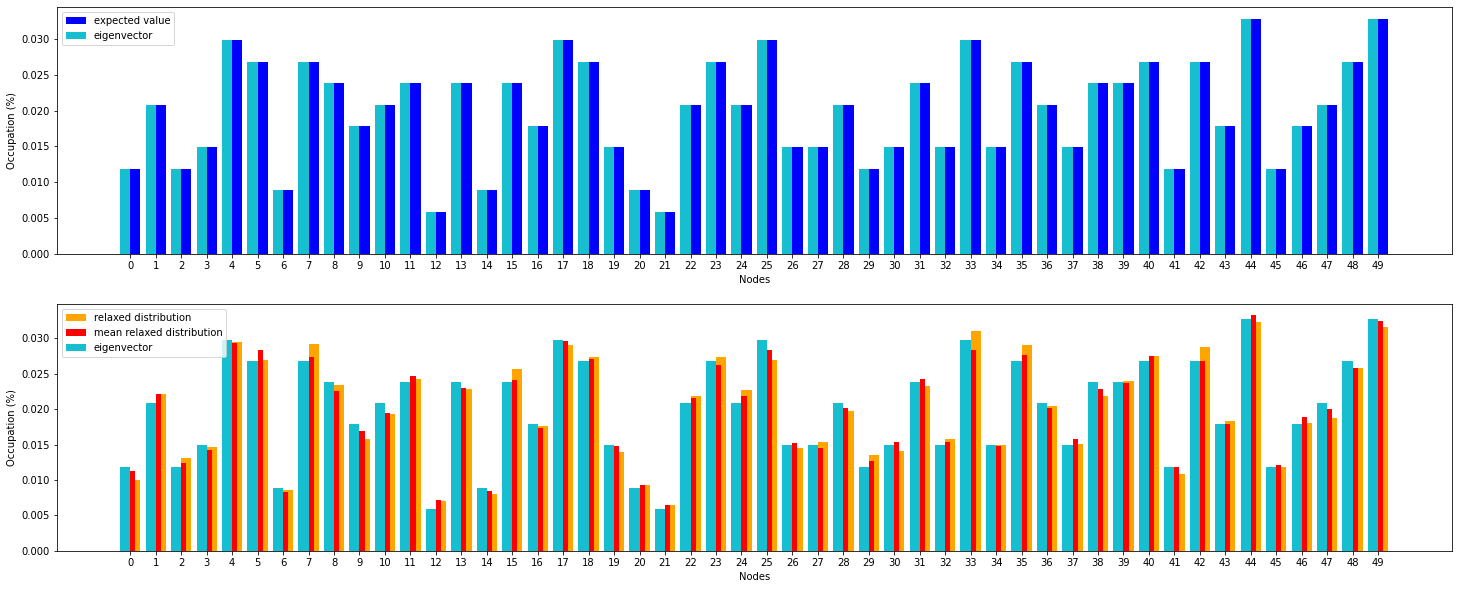

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.5*N, 10))

pSNorm = [d for n, d in G.degree()]
pSNorm = [h/sum(pSNorm) for h in pSNorm]

hMean = [[(h1+h2+h3)/(walker_per_node*N*3) 
         for h1, h2, h3 in zip(history[0][i], history[1][i], history[2][i])] for i in range(len(history[0]))]

ax[0].bar(G.nodes, [h/sum(pSNorm) for h in pSNorm], width=0.4, align='edge', color='blue', label="expected value")
ax[0].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

ax[1].bar(G.nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax[1].bar(G.nodes, hMean[-1], width=0.2, align='edge', color='red', label='mean relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)


plt.show()

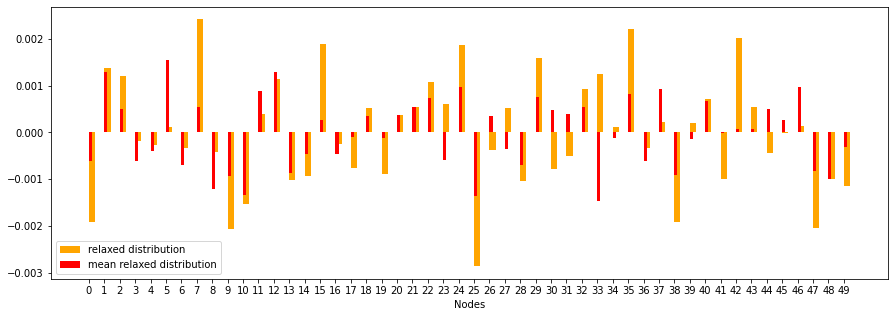

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.3*N, 5))

ax.bar(G.nodes, [h/sum(history[0][-1]) - k for h, k in zip(history[0][-1], pSNorm)], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax.bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1])) - k
                    for h1, h2, h3, k in zip(history[0][-1], history[1][-1], history[2][-1], pSNorm)],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')

ax.legend()
ax.set_xlabel("Nodes")
# ax.set_ylabel("Occupation (%)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

In [22]:
def gaus_law(x, a, mu=459, sigma=1):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

DIstribution for node 3 :
150.28
148.8095238095238

DIstribution for node 5 :
269.06
267.85714285714283

DIstribution for node 15 :
239.12
238.0952380952381

DIstribution for node 19 :
151.09
148.8095238095238



C:\Users\Fabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Fabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Fabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Fabri\AppData\Local\Packages\PythonSoftwareFounda

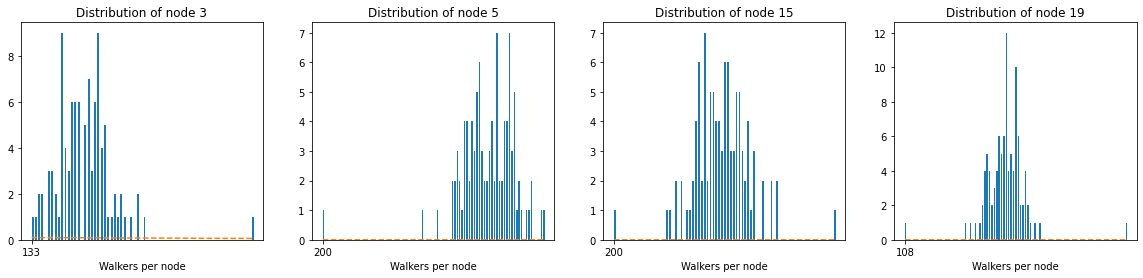

In [23]:
nodes = [3, 5, 15, 19]
p_node = []

fig, ax = plt.subplots(nrows = 1, ncols = len(nodes), figsize=(5*len(nodes), 4))

histo = hMean

n = [0]*len(nodes)
bins = [0]*len(nodes)

for i in range(len(nodes)):
    p_node += [[int(h[nodes[i]]*walker_per_node*N) for h in histo]]
    n[i], bins[i], patches = ax[i].hist(p_node[i], bins = walker_per_node*N, align='left', width=0.6)
    ax[i].set_title(f"Distribution of node {nodes[i]}")
    ax[i].set_xlabel("Walkers per node")
    ax[i].set_xticks(np.arange(min(p_node[i]), max(p_node[i]), 100))
    
mean = [0]*len(nodes)
for i in range(len(nodes)):
    print("DIstribution for node", nodes[i], ":")
    mean[i] = sum(p_node[i])/time_steps
    print(mean[i])
    print(pSNorm[nodes[i]]*N*walker_per_node)
    print()

popt = [0]*len(nodes)
pcov = [0]*len(nodes)
    
for i in range(len(nodes)):
    m = int(mean[i])
    popt[i], pcov[i] = curve_fit(gaus_law, bins[i][1:][m-5:m+5], n[i][m-5:m+5], 
                                 p0 = [wa, mean[i], 9])
    ax[i].plot(bins[i][1:], gaus_law(bins[i][1:], *popt[i]), '--')

plt.show()

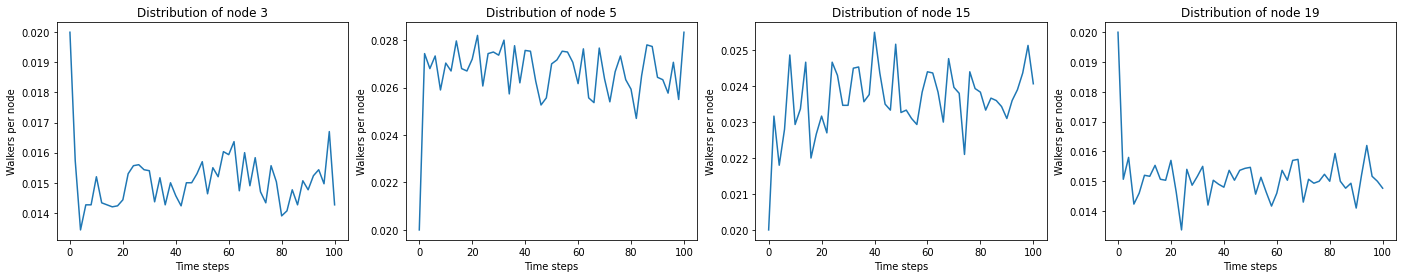

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = len(nodes), figsize=(6*len(nodes), 4))

time_range = hMean
index = np.arange(0, len(time_range), 2)

for i in range(len(nodes)):
    ax[i].plot(index, [time_range[ind][nodes[i]] for ind in index])
    ax[i].set_title(f"Distribution of node {nodes[i]}")
    ax[i].set_ylabel("Walkers per node")
    ax[i].set_xlabel("Time steps")

plt.show()

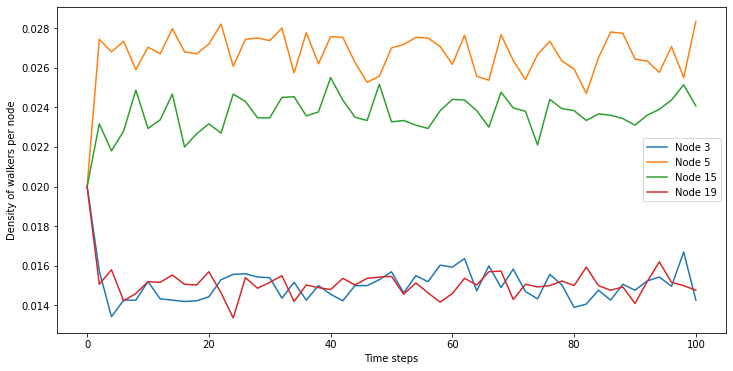

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,1.5*len(nodes)))

for i in nodes: #list(G.nodes)[0:3]:
    plt.plot(index, [time_range[ind][i] for ind in index], label = f"Node {i}")
#     plt.plot(index, [time_range[ind][i] for ind in index])
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.legend()

plt.show()

#### Note:

* aggiungere fit su distribuzioni di walkers

* sistema grafica concentrazioni di individui su ogni nodo

* fare grafico per fittare valore di Fiedler